<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.ticker as ticker

中国以生产法与收入法来核算GDP。生产法就是算各行业的added value加总。分类是根据《国民经济行业分类标准》来核算，但季度频率上无法获取全部行业的数据。

In [2]:
df=pd.read_excel('China Annual GDP.xls')
df.insert(loc = 0, column = 'Year', value = range(1978,2020))
df.drop(['指标'], axis=1, inplace = True)
df.set_index('Year', inplace = True) 
df.set_index(pd.to_datetime(df.index, format = '%Y')) # convert integer index to timestamp
pd.set_option('display.max_columns', None) # show all the columns

In [3]:
df.head(5)

,GDP(亿元),GDP(可比价格，亿元),GDP增长指数(上年＝100),GDP增长指数(1978年＝100),GDP增长指数(1990年＝100),GDP增长指数(2000年＝100),第一产业增加值,第一产业增加值(可比价格),第一产业增加值增长指数(上年＝100),第一产业增加值增长指数(1978年＝100),第一产业增加值增长指数(1990年＝100),第一产业增加值增长指数(2000年＝100),第二产业增加值,第二产业增加值(可比价格),第二产业增加值增长指数(上年＝100),第二产业增加值增长指数(1978年＝100),第二产业增加值增长指数(1990年＝100),第二产业增加值增长指数(2000年＝100),第三产业增加值,第三产业增加值(可比价格),第三产业增加值增长指数(上年＝100),第三产业增加值增长指数(1978年＝100),第三产业增加值增长指数(1990年＝100),第三产业增加值增长指数(2000年＝100),人均GDP(元),人均GDP增长指数(上年＝100),人均GDP增长指数(1978年＝100),国民总收入,国民总收入指数(上年=100),国民总收入指数(1978年=100),行业增加值_农、林、牧、渔业,工业增加值,行业增加值_建筑业,行业增加值_批发和零售业,行业增加值_交通运输、仓储和邮政业,行业增加值_住宿和餐饮业,行业增加值_金融业,行业增加值_房地产业,第一产业增加值占GDP比重,第二产业增加值占GDP比重,第三产业增加值占GDP比重,农、林、牧、渔业增加值占GDP比重,工业增加值占GDP比重,建筑业增加值占GDP比重,批发和零售业增加值占GDP比重,交通运输、仓储和邮政业增加值占GDP比重,住宿和餐饮业增加值占GDP比重,金融业增加值占GDP比重,房地产业增加值占GDP比重,行业增加值增长指数(上年＝100)_农、林、牧、渔业,工业增加值增长指数(上年＝100),行业增加值增长指数(上年＝100)_建筑业,行业增加值增长指数(上年＝100)_批发和零售业,行业增加值增长指数(上年＝100)_交通运输、仓储和邮政业,行业增加值增长指数(上年＝100)_住宿和餐饮业,行业增加值增长指数(上年＝100)_金融业,行业增加值增长指数(上年＝100)_房地产业,行业增加值增长指数(1978年＝100)_农、林、牧、渔业,工业增加值增长指数(1978年＝100),行业增加值增长指数(1978年＝100)_建筑业,行业增加值增长指数(1978年＝100)_批发和零售业,行业增加值增长指数(1978年＝100)_交通运输、仓储和邮政业,行业增加值增长指数(1978年＝100)_住宿和餐饮业,行业增加值增长指数(1978年＝100)_金融业,行业增加值增长指数(1978年＝100)_房地产业
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1978,3678.7,3593.0,111.7,100.0,NaN,NaN,1018.5,927.8,104.1,100.0,NaN,NaN,1755.1,1776.5,115.0,100.0,NaN,NaN,905.1,888.8,113.6,100.0,NaN,NaN,385,110.2,100.0,3678.7,111.7,100.0,1027.5,1621.4,138.9,242.4,182.0,44.6,76.5,79.9,27.69,47.71,24.6,27.9,44.1,3.8,6.6,4.9,1.2,2.1,2.2,104.1,116.4,99.5,123.1,108.9,118.1,110.1,105.7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1979,4100.5,3865.8,107.6,107.6,NaN,NaN,1259.0,984.7,106.1,106.1,NaN,NaN,1925.3,1922.6,108.2,108.2,NaN,NaN,916.1,958.5,107.8,107.8,NaN,NaN,423,106.2,106.2,4100.5,107.6,107.6,1270.2,1786.5,144.6,200.9,193.7,44.0,75.9,86.3,30.70,47.00,22.3,31.0,43.6,3.5,4.9,4.7,1.1,1.9,2.1,106.1,108.7,102.0,108.7,108.3,111.1,98.0,104.1,106.1,108.7,102.0,108.7,108.3,111.1,98.0,104.1
1980,4587.6,4587.6,107.8,116.0,NaN,NaN,1359.5,1359.5,98.5,104.6,NaN,NaN,2204.7,2204.7,113.5,122.8,NaN,NaN,1023.4,1023.4,106.1,114.4,NaN,NaN,468,106.5,113.1,4587.6,107.8,116.0,1371.6,2014.8,196.3,193.8,213.4,47.4,85.8,96.4,29.60,48.10,22.3,29.9,43.9,4.3,4.2,4.7,1.0,1.9,2.1,98.5,112.6,126.6,98.1,104.3,103.9,107.3,107.9,104.6,122.4,129.2,106.7,112.9,115.5,105.2,112.3
1981,4935.8,4822.1,105.1,122.0,NaN,NaN,1545.7,1454.4,107.0,111.9,NaN,NaN,2269.1,2246.3,101.9,125.1,NaN,NaN,1121.1,1121.5,109.6,125.3,NaN,NaN,497,103.8,117.3,4933.7,105.1,121.9,1559.4,2067.7,208.0,231.2,220.8,54.1,91.6,99.9,31.30,46.00,22.7,31.6,41.9,4.2,4.7,4.5,1.1,1.9,2.0,107.0,101.7,103.2,129.5,101.9,117.5,104.7,96.5,111.9,124.5,133.3,138.2,115.0,135.6,110.2,108.4
1982,5373.4,5257.0,109.0,132.9,NaN,NaN,1761.7,1622.1,111.5,124.8,NaN,NaN,2397.6,2371.5,105.6,132.1,NaN,NaN,1214.0,1263.4,112.7,141.2,NaN,NaN,533,107.4,126.0,5380.5,109.2,133.1,1777.3,2183.0,221.6,171.5,246.9,62.3,130.6,110.8,32.80,44.60,22.6,33.1,40.6,4.1,3.2,4.6,1.2,2.4,2.1,111.5,105.8,103.4,99.3,111.4,131.6,143.1,109.1,124.8,131.7,137.9,137.2,128.1,178.5,157.6,118.2


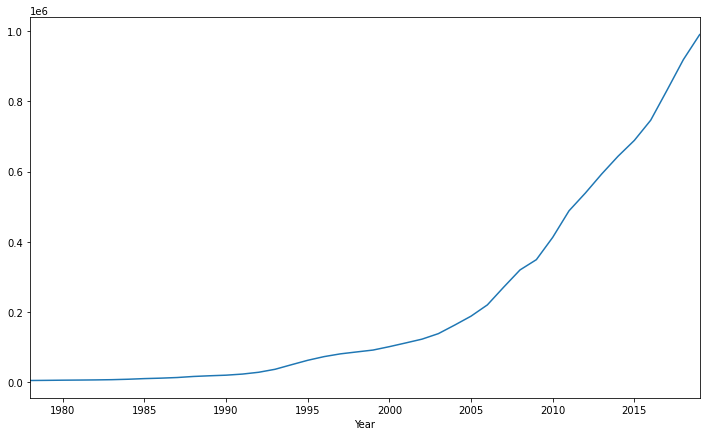

In [4]:
df['GDP(亿元)'].plot(figsize = (12, 7)); plt.show()

In [5]:
GDP_Industries = df[['第一产业增加值占GDP比重', '第二产业增加值占GDP比重','第三产业增加值占GDP比重']]

In [36]:
GDP_Industries.columns = ['Primary Pct', 'Secondary Pct', 'Tertiary Pct']

In [45]:
GDP_Industries.loc[2019]

Primary Pct       7.1
Secondary Pct    39.0
Tertiary Pct     53.9
Name: 2019, dtype: float64

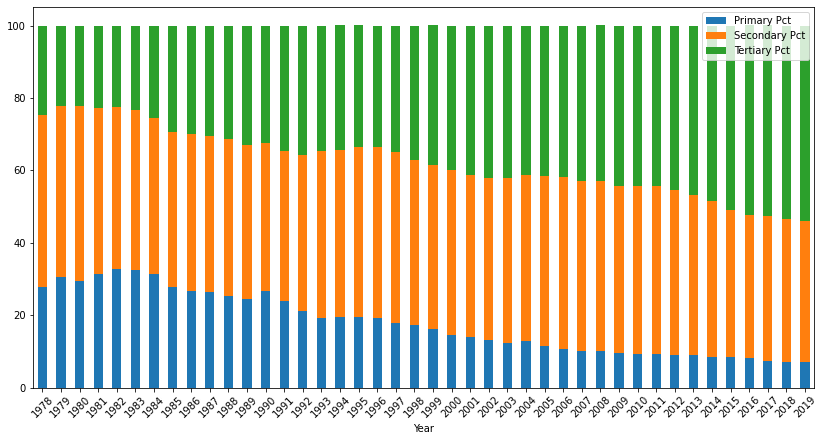

In [43]:
ax = GDP_Industries.plot(kind='bar', figsize = (14, 7),
                    stacked=True, rot=1,
                    title='')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)